In [1]:
import os
import sys
import argparse
import cv2
import random
import colorsys
import requests
from io import BytesIO

import skimage.io
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms
import numpy as np
from PIL import Image

import utils
import vision_transformer as vits

import imageio
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

/Users/lukethomas/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:405: DeprecationWarning: plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin

  warnings.warn(


# 1. Read Videos and split

In [17]:
vfn = '/Users/lukethomas/Documents/GitHub/surf-detection/dino/data/wc-jacks.stream.20210712T135457640.mp4' # TODO: enable folder input, and loop through fn in folder
vid = imageio.get_reader(vfn)
fps = vid.get_meta_data()['fps']
SecPerMin = 60
vid_len = int(vid.get_meta_data()['duration']*fps)
frame_idx = [i for i in range(vid_len) if i%(fps*SecPerMin) == 0]
print(frame_idx)
# for i, im in enumerate(vid):
#     if i%(fps*SecPerMin) == 0:
#         print(i)
#     if i > 2000:
#         break

# plt.imshow(vid[1000])
# plt.show()

[0, 1800, 3600, 5400, 7200, 9000, 10800, 12600, 14400, 16200, 18000]


18042.0

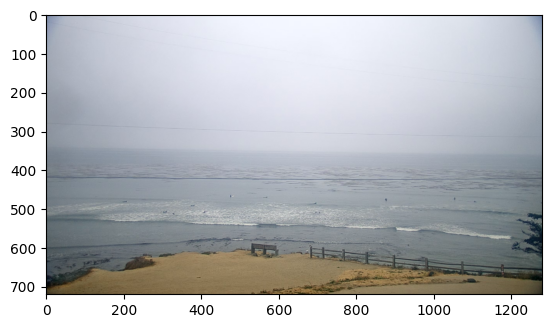

In [18]:
plt.imshow(vid.get_data(frame_idx[3]))
plt.show()